# Application of Genetic Algorithm and Neural Networks in Stock Trading

In [1]:
import numpy as np
from network import flatten_NN, reconstruct_NN
from typing import List, Tuple
from mate import mate
import pandas as pd
import matplotlib.pyplot as plt
from helper_module import split_train_set, split_train_test_sets
from numpy.typing import NDArray
from fitness import fitness, regime, compute_population_fitness, evaluate_nn
from initialize_nn import initialize_nn
from initialize_population import initialize_population
from selection import keep_elites, selection
import random
from mate import mate, reproduce_population, reduce_population
from checkpoint import checkpoint, load_checkpoint
from evolution import run_evolution
import os

                Close       Open       High        Low   Volume
Date                                                           
1986-01-02   172.6575   172.6575   172.6575   172.6575    600.0
1986-01-03   172.6575   172.6575   172.6575   172.6575   1900.0
1986-01-06   175.4879   175.4879   175.4879   175.4879   2800.0
1986-01-07   181.1488   175.4879   181.1488   175.4879   3200.0
1986-01-09   181.1488   181.1488   181.1488   181.1488   2600.0
...               ...        ...        ...        ...      ...
2023-09-12  1781.0000  1786.0000  1809.0000  1781.0000  12985.0
2023-09-13  1787.0000  1799.0000  1799.0000  1781.0000  16850.0
2023-09-14  1795.0000  1795.0000  1795.0000  1782.0000  12070.0
2023-09-15  1752.0000  1795.0000  1810.0000  1752.0000  29105.0
2023-09-18  1752.0000  1789.0000  1789.0000  1752.0000  27225.0

[8861 rows x 5 columns]


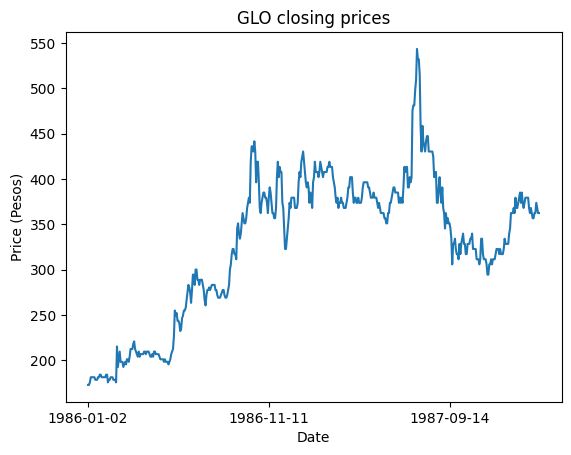

In [2]:
# read and print sample historical stock price data
series = pd.read_csv('../../Data/PH-historical-stock-price-data-csv/GLO.csv', header = 0, index_col = 'Date')
print(series)

# plot historical stock price data
fig, ax = plt.subplots()    
ax.set_title('GLO closing prices')
ax.set_xlabel('Date')
ax.set_ylabel('Price (Pesos)')
ax.plot(series['Close'].head(500))
ax.set_xticks(ax.get_xticks()[::200])
plt.show()

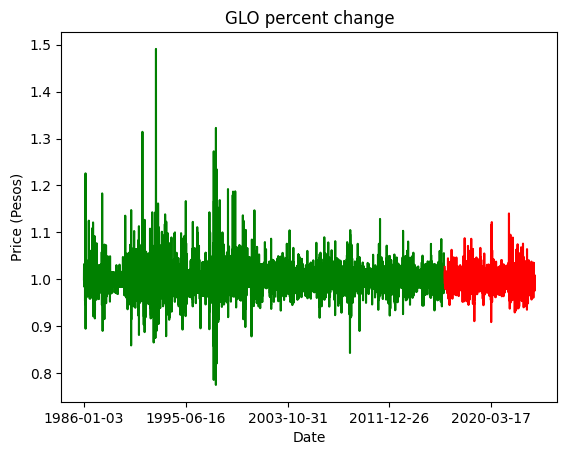

In [3]:
# use only the closing prices of the stock
series = series['Close']
series = series.pct_change(1) + 1
series = pd.Series(data = series, name = 'Close_pct_change')

# split data into train and test sets
train, test = split_train_test_sets(series)

# plot the train and test sets
fig, ax = plt.subplots()    
ax.set_title('GLO percent change')
ax.set_xlabel('Date')
ax.set_ylabel('Returns (%)')
ax.plot(train, 'g')
ax.plot(test, 'r')
ax.set_xticks(ax.get_xticks()[::2000])
plt.show()

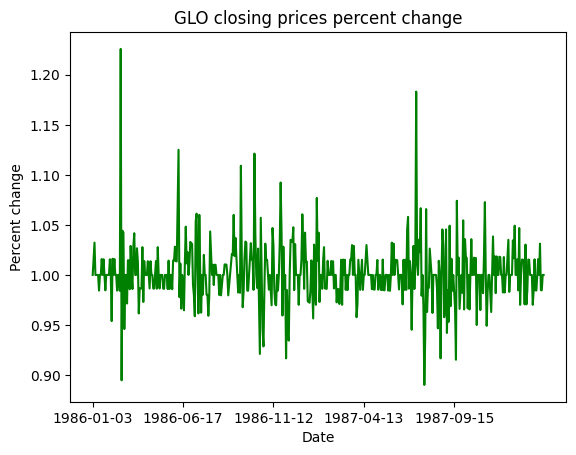

In [4]:
# split the train set into multiple batches
train_set = split_train_set(train)

# plot a sample of the train set
fig, ax = plt.subplots()    
ax.set_title('GLO closing prices percent change')
ax.set_xlabel('Date')
ax.set_ylabel('Percent change')
ax.plot(train_set[0], 'g')
ax.set_xticks(ax.get_xticks()[::100])
plt.show()

In [7]:
population = list()
population = initialize_population(num_individuals=100)

# start from generation 0
population = run_evolution(population = population,
                           window = 150, 
                           num_generations = 100, 
                           train_set = train_set, 
                           checkpoint_filepath = './checkpoint', 
                           checkpoint_interval = 10)

In [8]:
# population = load_checkpoint(checkpoint_filepath = './checkpoint/0.pkl')

# # start from a checkpoint
# population = run_evolution(population = population, 
#                            starting_generation = 1, 
#                            num_generations = 500, 
#                            train_set = train_set, 
#                            checkpoint_filepath = './checkpoint',
#                            checkpoint_interval = 10)

Generation: 747 -> 70.51
Mutation rate: 0.10
Generation: 748 -> 25.83
Mutation rate: 0.10
Generation: 749 -> -13.09
Mutation rate: 0.10
Generation: 750 -> -0.48
Mutation rate: 0.10
Generation: 751 -> -0.59
Mean historical average fitness: 16.44
Mutation rate: 0.15
Generation: 752 -> 99.46
Mean historical average fitness: 22.23
Mutation rate: 0.10
Generation: 753 -> -3.96
Mean historical average fitness: 16.27
Mutation rate: 0.15
Generation: 754 -> 24.48
Mean historical average fitness: 23.78
Mutation rate: 0.10
Generation: 755 -> -5.78
Mean historical average fitness: 22.72
Mutation rate: 0.15
Generation: 756 -> 21.30
Mean historical average fitness: 27.10
Mutation rate: 0.20
Generation: 757 -> 17.62
Mean historical average fitness: 10.73
Mutation rate: 0.15
Generation: 758 -> 15.09
Mean historical average fitness: 14.54
Mutation rate: 0.10
Generation: 759 -> 113.07
Mean historical average fitness: 32.26
Mutation rate: 0.05
Generation: 760 -> 4.34
Mean historical average fitness: 34.28

In [9]:
for i in range(10):
    test_sample = np.zeros([1,150])
    for i in range(150):
        test_sample[0][i] = np.random.uniform(0,1)

    probabilities = population[0].propagate_forward(test_sample)
    index = np.argmax(probabilities)
    print(probabilities, index)

[[2.03399900e-17 1.00000000e+00 7.23000371e-26]] 1
[[3.87865827e-20 1.00000000e+00 9.60768648e-26]] 1
[[1.02169966e-10 9.98772787e-01 1.22721317e-03]] 1
[[1.03478607e-17 9.99990973e-01 9.02665028e-06]] 1
[[9.89168081e-01 1.08319194e-02 6.37951432e-28]] 0
[[7.21740205e-42 3.76671826e-07 9.99999623e-01]] 2
[[3.70631412e-28 1.00000000e+00 3.80099900e-21]] 1
[[1.00000000e+00 3.23568165e-11 2.56428962e-26]] 0
[[1.00000000e+00 4.24069433e-14 7.17581781e-14]] 0
[[4.33504954e-10 7.75113098e-01 2.24886902e-01]] 1


In [11]:
for individual in population:
    print(individual.fitness)

21.24281244922026
21.24281244922026
21.24281244922026
21.24281244922026
6.494917213896748
6.494917213896748
6.494917213896748
6.494917213896748
6.494917213896748
6.494917213896748


In [12]:
# from fitness import test_fitness
# test_fitness(nn = population[0], window = 150,  train_set = train_set[0], regime = regime)

In [13]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(series)

In [42]:
# test_fitness, test_bnh_returns, test_strat_returns, test_max_drawdown, test_series, test_strat_sortino_ratio, test_num_trades = evaluate_nn(nn = population[0], train_set = train_set[2500], regime = regime, window = 150)
test_fitness, test_bnh_returns, test_strat_returns, test_max_drawdown, test_series, test_strat_sortino_ratio, test_num_trades = evaluate_nn(nn = population[2], train_set = train, regime = regime, window = 150)
# test_fitness, test_bnh_returns, test_strat_returns, test_max_drawdown, test_series, test_strat_sortino_ratio, test_num_trades = evaluate_nn(nn = population[2], train_set = test, regime = regime, window = 150)

In [43]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(test_series)

            Close_pct_change  Regime   Returns  Cumulative_Returns
Date                                                              
1986-01-03          1.000000     NaN  1.000000            0.000000
1986-01-06          1.016393     NaN  1.000000            0.000000
1986-01-07          1.032258     NaN  1.000000            0.000000
1986-01-09          1.000000     NaN  1.000000            0.000000
1986-01-10          1.000000     NaN  1.000000            0.000000
1986-01-13          1.000000     NaN  1.000000            0.000000
1986-01-14          1.000000     NaN  1.000000            0.000000
1986-01-15          0.984375     NaN  1.000000            0.000000
1986-01-17          1.000000     NaN  1.000000            0.000000
1986-01-20          1.000000     NaN  1.000000            0.000000
1986-01-21          1.015873     NaN  1.000000            0.000000
1986-01-22          1.000000     NaN  1.000000            0.000000
1986-01-23          1.015625     NaN  1.000000            0.00

In [44]:
print(test_bnh_returns)
print(test_fitness)
print(test_strat_returns)
print(test_num_trades)
print(test_max_drawdown)

1220.5334260023449
27024.49139931132
721.2063351650963
295
0.9274742696544169


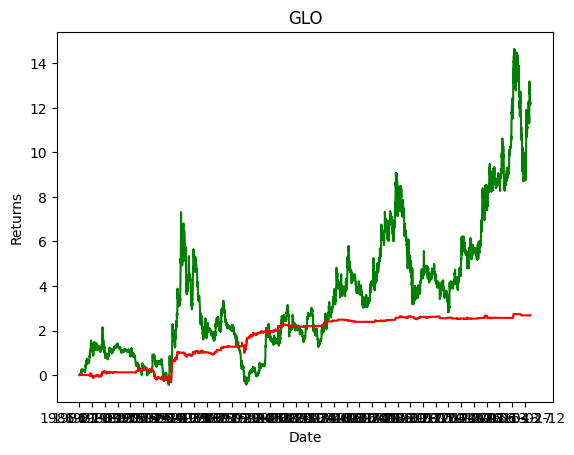

In [45]:
test_series['bnh'] = test_series['Close_pct_change'].cumprod() - 1

# plot historical stock price data
fig, ax = plt.subplots()    
ax.set_title('GLO')
ax.set_xlabel('Date')
ax.set_ylabel('Returns')
ax.plot(test_series.index, test_series['bnh'], color = 'g')
ax.plot(test_series.index, test_series['Cumulative_Returns'], color = 'r')
ax.set_xticks(ax.get_xticks()[::200])
plt.show()

In [18]:
# checkpoint(population = population, generation_number = 99999, checkpoint_filepath = './checkpoint')

In [19]:
# from sklearn.cluster import DBSCAN
# from sklearn.preprocessing import StandardScaler
# import numpy as np
# X = np.array([[1, 2], [2, 2], [2, 3],[8, 7], [8, 8], [25, 80]])
# clustering = DBSCAN(eps=3, min_samples=2).fit(X)
# print(clustering.labels_)
# DBSCAN(eps=3, min_samples=2)